In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head()

,gender,umur,diagnosa,lama
0,M,37,A91,4
1,M,18,A91,4
2,M,30,A91,4
3,F,37,A91,6
4,F,16,A91,6


Text(0, 0.5, 'lama_rawat')

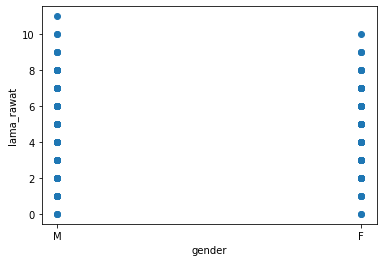

In [3]:
plt.scatter(df.gender,df.lama)
plt.xlabel('gender')
plt.ylabel('lama_rawat')

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['umur','lama']])
y_predicted

array([2, 0, 2, ..., 2, 0, 0], dtype=int32)

In [5]:
df['cluster']=y_predicted
df.head()

,gender,umur,diagnosa,lama,cluster
0,M,37,A91,4,2
1,M,18,A91,4,0
2,M,30,A91,4,2
3,F,37,A91,6,2
4,F,16,A91,6,0


In [6]:
km.cluster_centers_

array([[16.86422414,  3.82758621],
       [56.95652174,  4.48447205],
       [37.74674115,  4.15083799]])

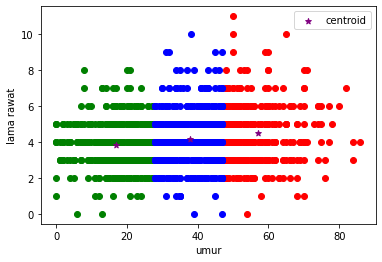

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.umur,df1['lama'],color='green')
plt.scatter(df2.umur,df2['lama'],color='red')
plt.scatter(df3.umur,df3['lama'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('umur')
plt.ylabel('lama rawat')
plt.legend()

In [8]:
df.to_csv ('hasil_kmeans_3_cluster.csv', index = False, header=True)

In [9]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['lama','umur']])
y_predicted

array([2, 3, 2, ..., 2, 0, 0], dtype=int32)

In [10]:
df['cluster']=y_predicted
df.head()

,gender,umur,diagnosa,lama,cluster
0,M,37,A91,4,2
1,M,18,A91,4,3
2,M,30,A91,4,2
3,F,37,A91,6,2
4,F,16,A91,6,3


In [11]:
km.cluster_centers_

array([[ 3.79190751,  9.5433526 ],
       [ 4.35502959, 48.61538462],
       [ 4.17352941, 35.92058824],
       [ 3.85250737, 22.2300885 ],
       [ 4.48120301, 64.68421053]])

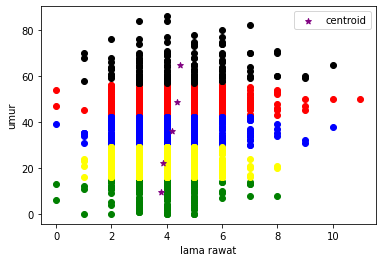

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1.lama,df1.umur,color='green')
plt.scatter(df2.lama,df2.umur,color='red')
plt.scatter(df3.lama,df3.umur,color='blue')
plt.scatter(df4.lama,df4.umur,color='yellow')
plt.scatter(df5.lama,df5.umur,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('lama rawat')
plt.ylabel('umur')
plt.legend()

In [13]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['umur','lama']])
    sse.append(km.inertia_)

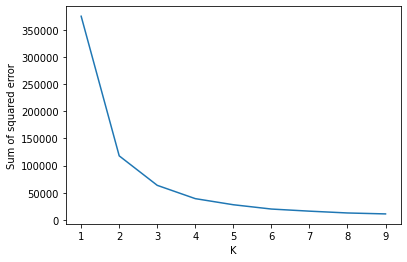

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)